Primeramente vamos a importar el modelo.

In [1]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import math
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

In [2]:
dtf = pd.read_csv('../Data/diamonds_output/Cleaned_diamonds.csv')

In [3]:
dtf.head(2)

,carat,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,56.0,4.29,4.31,2.7,605,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.34,55.0,4.46,4.49,2.8,565,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
y = dtf["price"]

In [5]:
dtf.drop("price",axis=1,inplace=True)
X= dtf
X1= dtf

In [6]:
dtf.head(1)

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.3,56.0,4.29,4.31,2.7,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [7]:
pipeline = [
    StandardScaler(),
    Normalizer()
]
tr = make_pipeline(*pipeline)


X_ready1 = tr.fit_transform(X1)
X_ready1 = pd.DataFrame(X_ready1, columns=X.columns)

In [8]:
X_ready1

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.233680,-0.148041,-0.285263,-0.283718,-0.268891,0.0,-0.071422,-0.181856,-0.132504,0.396850,...,-0.074132,-0.051739,0.0,0.0,-0.128616,-0.100958,-0.096466,0.392535,-0.062266,-0.073403
1,-0.233377,-0.273640,-0.273355,-0.269286,-0.257166,0.0,-0.077603,0.291337,-0.143972,-0.133505,...,-0.080548,-0.056217,0.0,0.0,0.411935,-0.109695,-0.104815,-0.134972,-0.067654,-0.079755
2,-0.172221,0.438547,-0.188462,-0.181051,-0.203745,0.0,-0.065971,-0.167979,-0.122393,0.366567,...,-0.068475,-0.047791,0.0,0.0,0.350193,-0.093254,-0.089105,-0.114742,-0.057514,-0.067801
3,-0.186046,0.183731,-0.199637,-0.197574,-0.197603,0.0,-0.071267,-0.181463,0.367203,-0.122605,...,-0.073972,-0.051628,0.0,0.0,-0.128338,-0.100740,0.504385,-0.123953,-0.062131,-0.073244
4,0.046639,0.542847,0.068817,0.074199,0.058983,0.0,-0.067011,-0.170624,-0.124321,0.372341,...,-0.069553,-0.048544,0.0,0.0,0.355708,-0.094722,-0.090508,-0.116550,-0.058420,-0.068869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37522,-0.216214,-0.142747,-0.252136,-0.250506,-0.253063,0.0,-0.068867,0.258542,-0.127765,-0.118476,...,-0.071480,-0.049889,0.0,0.0,-0.124016,-0.097347,0.487398,-0.119779,-0.060039,-0.070777
37523,-0.235482,-0.044579,-0.281474,-0.277871,-0.290440,0.0,-0.071972,0.270200,-0.133526,-0.123818,...,-0.074704,-0.052139,0.0,0.0,-0.129608,-0.101736,-0.097210,0.395563,-0.062746,-0.073969
37524,-0.183038,0.071080,-0.179637,-0.176808,-0.159440,0.0,-0.085228,-0.217011,0.439136,-0.146623,...,-0.088462,-0.061741,0.0,0.0,0.452412,-0.120474,-0.115114,-0.148235,-0.074302,-0.087592
37525,-0.174501,-0.138555,-0.194666,-0.192776,-0.167254,0.0,0.638977,-0.170203,-0.124014,-0.114997,...,-0.069381,-0.048424,0.0,0.0,-0.120374,-0.094488,-0.090285,0.367382,-0.058276,-0.068699


In [9]:
#Estandarizamos los datos prediction.

# KNeighborsRegressor

Datos estandarizados

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ready1, y, test_size=0.2, random_state=0)

In [11]:
neigh1 = KNeighborsRegressor(n_neighbors=2)
neigh1.fit(X_train1, y_train1)

KNeighborsRegressor(n_neighbors=2)

In [12]:
y_pred_neigh1 = neigh1.predict(X_test1)
print(mean_squared_error(y_test1, y_pred_neigh1))
print(neigh1.score(X_train1, y_train1))
print(neigh1.score(X_test1, y_test1))
print(math.sqrt(mean_squared_error(y_test1,y_pred_neigh1)))

588645.9991007195
0.9894142635666531
0.963312345301095
767.2326890199084


# KNeighborsRegressor

Datos sin estandarizar

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [15]:
y_pred_neigh = neigh.predict(X_test)
print(mean_squared_error(y_test, y_pred_neigh))
print(neigh.score(X_train, y_train))
print(neigh.score(X_test, y_test))
print(math.sqrt(mean_squared_error(y_test,y_pred_neigh)))

766424.0225819345
0.9867765383267929
0.9522322415570846
875.4564652693671


# MLPRegressor

MLPRegressor con datos normalizados y estandarizados.

In [16]:
regr1 = MLPRegressor(max_iter=500).fit(X_train1, y_train1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
y_pred_regr1 = regr1.predict(X_test1)

In [18]:
print(mean_squared_error(y_test1, y_pred_regr1))
print(regr1.score(X_train1, y_train1))
print(regr1.score(X_test1, y_test1))
print(math.sqrt(mean_squared_error(y_test1,y_pred_regr1)))

355732.83170558774
0.9771672757222682
0.9778287743149254
596.4334260465184


# MLPRegressor

MLPRegressor con datos sin  normalizar o estandarizar.

In [19]:
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
y_pred_regr = regr.predict(X_test)

In [21]:
print(mean_squared_error(y_test, y_pred_regr))
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
print(math.sqrt(mean_squared_error(y_test,y_pred_regr)))

434174.8609388218
0.970764564283373
0.9729398358242419
658.919464683524


# LinearRegression

Datos Normalizados y estandarizados.

In [22]:
linear1 = LinearRegression().fit(X_train1, y_train1)

In [23]:
y_pred_linear1 = linear1.predict(X_test1)

In [24]:
print(mean_squared_error(y_test1, y_pred_linear1))
print(linear1.score(X_train1, y_train1))
print(linear1.score(X_test1, y_test1))
print(math.sqrt(mean_squared_error(y_test1,y_pred_linear1)))

1087649.0304870864
0.9278477869544646
0.9322117331552926
1042.9041329322108


# LinearRegression

Datos sin estandarizar o normalizar

In [25]:
linear = LinearRegression().fit(X_train, y_train)

In [26]:
y_pred_linear = linear.predict(X_test)

In [27]:
print(mean_squared_error(y_test, y_pred_linear))
print(linear.score(X_train, y_train))
print(linear.score(X_test, y_test))
print(math.sqrt(mean_squared_error(y_test,y_pred_linear)))

965763.9722234907
0.9346845545158012
0.9398082800397735
982.7329099116864


# RandomForestRegresor

Datos sin estandarizar o normalizar

In [28]:
Random = RandomForestRegressor(bootstrap=True,max_depth=20,max_features="auto",n_estimators=200).fit(X_train, y_train)

In [29]:
y_pred = Random.predict(X_test)

In [30]:
print(mean_squared_error(y_test, y_pred))
print(Random.score(X_train, y_train))
print(Random.score(X_test, y_test))

309581.7688587088
0.9972973850237101
0.9807051622633706


In [31]:
print(math.sqrt(mean_squared_error(y_test,y_pred)))

556.4007268675238


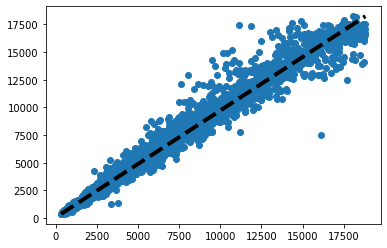

In [32]:
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)


# RandomForestRegresor

Datos estandarizados 

In [33]:
Random1 = RandomForestRegressor(bootstrap=True,max_depth=20,max_features="auto",n_estimators=200).fit(X_train1, y_train1)

In [34]:
y_pred1 = Random1.predict(X_test1)

In [35]:
print(mean_squared_error(y_test1, y_pred1))
print(Random1.score(X_train1, y_train1))
print(Random1.score(X_test1, y_test1))

313697.75319708884
0.997117444118722
0.9804486314921035


In [36]:
print(math.sqrt(mean_squared_error(y_test1,y_pred1)))

560.087272839768


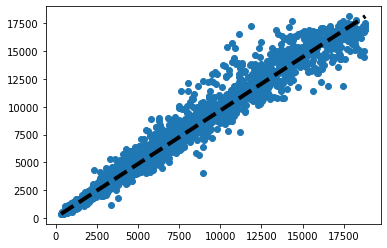

In [37]:
plt.scatter(y_test,y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_pred1.min(), y_pred1.max()], 'k--', lw=4)


introducimos nuestro dataset limpio

In [38]:
predict= pd.read_csv('../Data/diamonds_output/predict_submit.csv')

In [39]:
predict.head(1)

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.36,54.0,8.68,8.57,5.24,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


Normalizamos los datos para aplicarlos sobre los modelos entrenados con datos normalizados.

In [40]:
predict_ready = tr.fit_transform(predict)
predict_ready = pd.DataFrame(predict_ready, columns=predict.columns)

In [41]:
predict_ready.head(1)

,carat,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.459238,-0.218519,0.368391,0.357015,0.343933,-0.025327,-0.044533,0.17264,-0.083529,-0.074158,...,0.424243,-0.033015,-0.017247,-0.026535,-0.079243,0.305983,-0.05902,-0.075851,-0.037028,-0.045561


Normalizamos los datos para aplicarlos sobre los modelos entrenados con datos normalizados.

Lanzamos el primer predict para el modelo de random forest con datos normalizados y estandarizados. 

In [42]:
Random = RandomForestRegressor(bootstrap=True,max_depth=20,max_features="auto",n_estimators=500,min_samples_split=5).fit(X, y)

In [43]:
prediccion_Random = Random.predict(predict)

In [44]:
df_prediccion_Random = pd.DataFrame(prediccion_Random)

In [45]:
df_prediccion_Random.rename(columns={0: 'price'}, inplace=True)

In [46]:
df_prediccion_Random.index.names = ['id']

In [47]:
df_prediccion_Random.to_csv('../Data/Submisions_to_kaggle/df_prediccion_Random.csv')

Lanzamos el segundo predict para el modelo de linear model, sin estandarizar ni normalizar 

In [48]:
y_pred_linear = linear.predict(predict)

In [49]:
df_y_pred_linear = pd.DataFrame(prediccion_Random1)

NameError: name 'prediccion_Random1' is not defined

In [ ]:
df_y_pred_linear.rename(columns={0: 'price'}, inplace=True)

In [ ]:
df_y_pred_linear.index.names = ['id']

In [ ]:
df_y_pred_linear.to_csv('../Data/Submisions_to_kaggle/df_y_pred_linear.csv')

# Mejoramos el proyecto realizando un grid sobre Random Forest Regression.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

# GradientBoostingRegressor

Aplicamos gradient Boosting regressor sin datos normalizados.

In [ ]:
grad = GradientBoostingRegressor(n_estimators = 3000, min_samples_split = 50, learning_rate = 0.05).fit(X_train, y_train)

In [ ]:
y_grad = grad.predict(X_test)

In [ ]:
print(mean_squared_error(y_test1, y_grad))
print(grad.score(X_train, y_train))
print(grad.score(X_test, y_test))
print(math.sqrt(mean_squared_error(y_test,y_grad)))

In [ ]:
plt.scatter(y_test,y_grad)
plt.plot([y_test.min(), y_test.max()], [y_grad.min(), y_grad.max()], 'k--', lw=4)

Finalmente lo subimos a kaggle.

In [ ]:
grad = GradientBoostingRegressor(n_estimators = 871, min_samples_split = 3, learning_rate = 0.3).fit(X, y)

In [ ]:
prediction_grad = grad.predict(predict)

In [ ]:
df_prediction_grad = pd.DataFrame(prediction_grad)
df_prediction_grad.rename(columns={0: 'price'}, inplace=True)
df_prediction_grad.index.names = ['id']
df_prediction_grad.to_csv('../Data/Submisions_to_kaggle/prediction_grad.csv')

In [ ]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, "b", label="Train AUC")
line2, = plt.plot(learning_rates, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning rate")
plt.show()

In [ ]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

In [ ]:
max_features = list(range(1,train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, "b", label="Train AUC")
line2, = plt.plot(max_features, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max features")
plt.show()